# Data Science Final Project
---

## Problem Description

1.1 Background
A startup company has decided to enter into the real estate market in the Canada. The company's CEO acknowledges the challenges and barriers his company is going to face since the sector is very saturated and many agencies already operate in the sector. However, he believes that a modern data-driven approach can help him to identify the gaps in the market. Once the gaps are identified, the company can enter the market by offering the best practice. 

1.2 Problem
As possible locations for the initial operations the company has identified the most important city in Canada, Toronto. The city is very famous and attracts younger generation from nearby cities as well as from thousands of foreigners every year. Thus, the CEO of the startup, wants to offer divide the Toronto city based on the preferences of the incomers and younger families willing to buy or rent property in Toronto. 

1.3 Stakeholders
This approach is going to be beneficial for both: the client is going to visit the places he/she likes the most, and the company can charge an extra fee for the personalized tour. So the company needs a clear mapping of the city in form of clusters, based on the venues available in different neighborhoods. 

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

## 1. Getting the data from the wiki page

1.1 Getting the data from the link
---

In [2]:
d=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
d[0].head(5)

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


1.2 Creating a Dataframe
---

In [3]:
df=pd.DataFrame(d[0],columns = ["Postal code", "Borough", "Neighborhood"])
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


1.3 Change the column name to be in sound with the assignment
---

In [4]:
df.rename(columns = {'Postal code':'PostalCode'}, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


1.4 Let's get rid of the Boroughs which are 'Not assigned'
---

In [5]:
df=df[df['Borough']!='Not assigned']
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


1.5 Again, for being in sound with the assignment, let's replace '/' with ',' , since the data is already groupped. 
---

In [6]:
df["Neighborhood"] = df["Neighborhood"].str.replace("/",",")
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


1.6 Finally, let's check the shape of the dataframe.
---

In [7]:
print("Shape: ", df.shape)

Shape:  (103, 3)


## Part 2: Getting the coordinates

Problem Description
---
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

2.1 Loading the second data
---

In [8]:
df_geo_coord = pd.read_csv(r'C:\Users\Dell\Desktop\Geospatial_Coordinates.csv')
df_geo_coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


2.2 Merge two dataframes toghether
---

In [9]:
toronto_coor = pd.merge(df, df_geo_coord, how='left', left_on = 'PostalCode', right_on = 'Postal Code')
toronto_coor.drop("Postal Code", axis=1, inplace=True)
toronto_coor.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


## Part 3: Plotting

3.1 Getting the coordinates of Toronto city.
---

In [10]:
toronto_address = "Toronto, ON"
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(toronto_address)
latitude = location.latitude
longitude = location.longitude
print('The latitude and longitude coordinates of Toronto city are {}, {}.'.format(latitude, longitude))

The latitude and longitude coordinates of Toronto city are 43.6534817, -79.3839347.


3.2 Plot the map
---

In [11]:
toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
toronto

3.3 PLot a map of Toronto with neighborhoods superimposed on top.
---

In [12]:
for lat, lng, borough, neighborhood in zip(
        toronto_coor['Latitude'], 
        toronto_coor['Longitude'], 
        toronto_coor['Borough'], 
        toronto_coor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto)  

toronto

3.4 Let's only take the Toronto city for the analysis, thus, need to filter only the Boroughs containing the word 'Toronto'
---

In [13]:
df_toronto = toronto_coor[toronto_coor['Borough'].str.contains("Toronto")].reset_index(drop=True)
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


3.5 Let's plot the map again, this time, only for Toronto City.
---

In [14]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, neighborhood in zip(
        df_toronto['Latitude'], 
        df_toronto['Longitude'], 
        df_toronto['Borough'], 
        df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

## Part 4: Forsquare API

Define Foursquare Credentials and Version
---

In [15]:
CLIENT_ID = 'XB1QGFJPWQJFQXIOO5GR2IUYDPYXBT1FOU3ROMX1F1GKEWPI' #  Foursquare ID
CLIENT_SECRET = 'PLCDKLZJEIADBR0DBX3WLVCWG1U0OIBSIFXO5IQG2VITI1KL' #  Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XB1QGFJPWQJFQXIOO5GR2IUYDPYXBT1FOU3ROMX1F1GKEWPI
CLIENT_SECRET:PLCDKLZJEIADBR0DBX3WLVCWG1U0OIBSIFXO5IQG2VITI1KL


4.1 Now, let's select the first neighborhood in the list
---

In [16]:
neighborhood_name = df_toronto.loc[0, 'Neighborhood']
print(f"The first neighborhood's name is '{neighborhood_name}'.")

The first neighborhood's name is 'Regent Park , Harbourfront'.


4.2 Let's get the coordinates for this neighborhood
---

In [17]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park , Harbourfront are 43.6542599, -79.3606359.


4.3 Let's get the top 100 venues that are in Regent Park , Harbourfront within a radius of 500 meters.
---

In [18]:
import requests
LIMIT = 100 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

4.4 Function that extracts the category of the venue
---

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

4.5 Now we are ready to clean the json and structure it into a pandas dataframe.
---

In [20]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874
5,Impact Kitchen,Restaurant,43.656369,-79.356980
6,Corktown Common,Park,43.655618,-79.356211
7,The Extension Room,Gym / Fitness Center,43.653313,-79.359725
8,The Distillery Historic District,Historic Site,43.650244,-79.359323
9,Figs Breakfast & Lunch,Breakfast Spot,43.655675,-79.364503


#### The number of venues returned

In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


## 5: Explore Neighborhoods in Toronto City

5.1 Let's create a function to repeat the same process to all the neighborhoods in Toronto City.
---

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

5.2 this code runs the above function on each neighborhood and creates a new dataframe.
---

In [23]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

#### let's see the results

In [24]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park , Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


#### and check the new dataframe's shape

In [25]:
print(toronto_venues.shape)

(1623, 7)


## 6: Analyzing Neighborhoods

6.1 Count by Neighborhood
---

In [26]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,57,57,57,57,57,57
"Brockton , Parkdale Village , Exhibition Place",23,23,23,23,23,23
Business reply mail Processing CentrE,18,18,18,18,18,18
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport",17,17,17,17,17,17
Central Bay Street,63,63,63,63,63,63
Christie,17,17,17,17,17,17
Church and Wellesley,78,78,78,78,78,78
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
Davisville,36,36,36,36,36,36


#### And let's examine the new dataframe size.

In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 231 uniques categories.


6.2 Analyze Each Neighborhood
---

In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Check the shape

In [29]:
toronto_onehot.shape

(1623, 231)

6.3 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
---

In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton , Parkdale Village , Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Business reply mail Processing CentrE,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,...,0.012821,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Commerce Court , Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,...,0.000000,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### check the shape

In [31]:
toronto_grouped.shape

(39, 231)

6.4 Let's print each neighborhood along with the top 5 most common venues
---

In [32]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2                Café  0.04
3          Restaurant  0.04
4  Seafood Restaurant  0.04


----Brockton , Parkdale Village , Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2       Nightclub  0.09
3     Coffee Shop  0.09
4   Grocery Store  0.04


----Business reply mail Processing CentrE----
              venue  freq
0       Yoga Studio  0.06
1     Auto Workshop  0.06
2       Pizza Place  0.06
3        Comic Shop  0.06
4  Recording Studio  0.06


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3          Boutique  0.06
4  Sculpture Garden  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1  Italian Restaurant  0.08
2              

6.5 In order to create a new dataframe, first, let's write a function to sort the venues in descending order.
---

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

6.6 Now let's create the new dataframe and display the top 10 venues for each neighborhood.
---

In [34]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Cheese Shop,Restaurant,Café,Bakery,Seafood Restaurant,Bistro,Jazz Club
1,"Brockton , Parkdale Village , Exhibition Place",Café,Coffee Shop,Nightclub,Breakfast Spot,Pet Store,Stadium,Intersection,Bakery,Italian Restaurant,Restaurant
2,Business reply mail Processing CentrE,Yoga Studio,Auto Workshop,Park,Comic Shop,Pizza Place,Recording Studio,Burrito Place,Restaurant,Brewery,Light Rail Station
3,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Boutique,Rental Car Location,Plane,Boat or Ferry,Harbor / Marina,Bar
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Ice Cream Shop,Middle Eastern Restaurant,Bar,Thai Restaurant,Burger Joint,Fried Chicken Joint


## Part 7: Clustering

7.1 Run k-means to cluster the neighborhood into 5 clusters.
---

In [35]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1).reset_index(drop=True)
from sklearn.preprocessing import MinMaxScaler
#Elbow Method For Optimal k
mms = MinMaxScaler()
mms.fit(toronto_grouped_clustering)
data_transformed = mms.transform(toronto_grouped_clustering)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

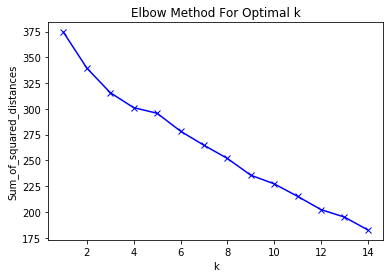

In [36]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

7.2 Run k-means to cluster the neighborhood into 5 clusters.
---

In [37]:
# set number of clusters
kclusters = 6



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

7.3 Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
---

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Mexican Restaurant,Restaurant,Chocolate Shop
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Burrito Place,Beer Bar,Italian Restaurant,Juice Bar,Sandwich Place,Burger Joint
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Restaurant,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Hotel,Restaurant,Gym,Italian Restaurant,Department Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


7.4 Finally, let's visualize the resulting clusters
---

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        toronto_merged['Latitude'], 
        toronto_merged['Longitude'], 
        toronto_merged['Neighborhood'], 
        toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.4).add_to(map_clusters)
       
map_clusters

## Part 8:Examine Clusters

Cluster 1
---

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Mexican Restaurant,Restaurant,Chocolate Shop
1,Downtown Toronto,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Burrito Place,Beer Bar,Italian Restaurant,Juice Bar,Sandwich Place,Burger Joint
2,Downtown Toronto,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Restaurant,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Ramen Restaurant
3,Downtown Toronto,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Hotel,Restaurant,Gym,Italian Restaurant,Department Store
4,East Toronto,Trail,Health Food Store,Pub,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
5,Downtown Toronto,Coffee Shop,Cocktail Bar,Beer Bar,Cheese Shop,Restaurant,Café,Bakery,Seafood Restaurant,Bistro,Jazz Club
6,Downtown Toronto,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Ice Cream Shop,Middle Eastern Restaurant,Bar,Thai Restaurant,Burger Joint,Fried Chicken Joint
7,Downtown Toronto,Grocery Store,Café,Park,Candy Store,Athletics & Sports,Restaurant,Italian Restaurant,Diner,Nightclub,Coffee Shop
8,Downtown Toronto,Coffee Shop,Café,Restaurant,Thai Restaurant,Deli / Bodega,Gym,Clothing Store,Hotel,Bakery,Steakhouse
9,West Toronto,Bakery,Pharmacy,Supermarket,Music Venue,Bank,Brewery,Pool,Recording Studio,Café,Middle Eastern Restaurant


Cluster 2
---

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,Park,Women's Store,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


Cluster 3
---

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,Garden,Women's Store,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


Cluster 4
---

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,Park,Jewelry Store,Trail,Bus Line,Sushi Restaurant,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


Cluster 5
---

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Downtown Toronto,Park,Playground,Trail,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


Cluster 6
---

In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,Swim School,Park,Construction & Landscaping,Bus Line,Women's Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


# Conclusion

The startup company wants to employ a data driven approach to map the Toronto city by identifying and clustering identical neighborhoods into clusters. This will allow the company to offer real estate in the neighborhoods more suiting to the needs and preferences of the clients. 
With this purpose in mind, data on Toronto postal codes and neighborhoods, longitude and latitudes, and forsquare venues were collected. After data processing the data of different sources were merged together to form a final data frame, which was going to be analyzed by conducting K-means clustering technique. The analysis showed that the optimal number of clusters should be 6. Hence, the Toronto City neighborhoods were clustered into 6 clusters. The first cluster turned to be the largest one, as it contained the majority of neighborhoods. The similarities of those neighborhoods were in the large number of restaurants, coffee shops, and other entertainment venues. On the other hand, the other 5 clusters were dominantly consisted of gardens, parks, swimming pools and playgrounds, which can be very suitable for elder couples or for any client seeking peace and nature.
This analysis can be further implemented by increasing the number of clusters by breaking down the first cluster, in order to be able to make more personalized offers to the clients.
